# Mental Health in Tech Industry Analysis 2014-2019
### *author: Celine Ng*
### *April 2024*

# Table of Contents 
1. Notebook Preparation
    1.1 Libraries Installation
    1.2 Data Retrieval
    1.3 Initial Data Cleaning
2. Dataset 'Answer'
    2.1 Overview of the Surveys Over the Years
        2.1.1 Insights
    2.2 

# 1. Notebook preparation
## 1.1 Libraries Installation

In [185]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

## 1.2 Data Retrieval
Objective: Preview datasets and have a general understanding of each of the 
tables.

Create a relative path to the SQLite database and connect to the SQLite 
database

In [187]:
database_path = 'mental_health.sqlite'
conn = sql.connect(database_path)

Check how many tables is in the database and the names of them

In [188]:
query = 'SELECT name FROM sqlite_master WHERE type="table";'
tables = pd.read_sql_query(query, conn)
print(tables)

       name
0    Answer
1  Question
2    Survey


**Answer**

In [189]:
answer_df = pd.read_sql('SELECT * FROM Answer', conn)
answer_df

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


In [190]:
answer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236898 entries, 0 to 236897
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   AnswerText  236898 non-null  object
 1   SurveyID    236898 non-null  int64 
 2   UserID      236898 non-null  int64 
 3   QuestionID  236898 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.2+ MB


In [191]:
answer_df.UserID.nunique()

4218

There are 236898 columns in the Answer dataset, with 2 foreign keys, 
SurveyID and QuestionID. 
In total, 4218 people answered the survey.

**Question**

In [192]:
question_df = pd.read_sql('SELECT * FROM Question', conn)
question_df

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers woul...,114
101,"If yes, what condition(s) have you been diagno...",115
102,"If maybe, what condition(s) do you believe you...",116
103,Which of the following best describes your wor...,117


In [193]:
question_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   questiontext  105 non-null    object
 1   questionid    105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


There are 105 distinct questions. The dataset includes a primary key,
questionID.

**Survey**

In [194]:
survey_df = pd.read_sql('SELECT * FROM Survey', conn)
survey_df

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [195]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SurveyID     5 non-null      int64 
 1   Description  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


We have a missing year 2015. This dataset includes a primary key, SurveyID.

## 1.3 Initial Data Cleaning
Objective: Check for missing values and duplicates 

In [196]:
datasets = [answer_df, question_df, survey_df]

1. Check for duplicates in each dataset.

In [197]:
for dataset in datasets:
    print(dataset.duplicated().any())

False
False
False


2. Check for missing values in each dataset.

In [198]:
for dataset in datasets:
    print(dataset.isna().any().any())

False
False
False


There is no missing values or duplicated rows in all 3 datasets.

# 2. Dataset 'Answer'
## 2.1 Overview of the Surveys Over the Years

Objective: 
1. Have a better understanding of how the surveys were constructed over the 
years. 
2. Due to the large size of our dataset, select questions to be further 
analyzed.

1. How many total replies have there been over time?

In [199]:
query = '''SELECT SurveyID, COUNT(1) AS TotalAnswers
 FROM Answer 
 GROUP BY SurveyID;
 ''' 

answers_over_time = pd.read_sql_query(query, conn)
answers_over_time

,SurveyID,TotalAnswers
0,2014,32760
1,2016,88238
2,2017,57456
3,2018,31692
4,2019,26752


<Axes: xlabel='SurveyID', ylabel='TotalAnswers'>

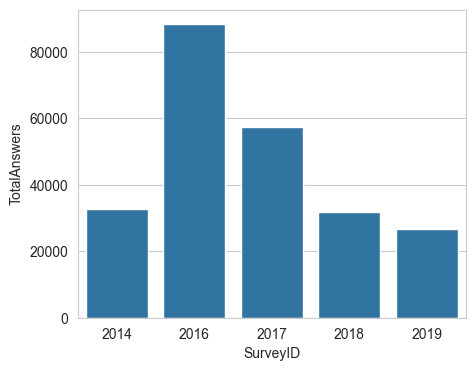

In [200]:
plt.figure(figsize=(5, 4))
sns.set_style(style='whitegrid')
sns.barplot(data=answers_over_time, x='SurveyID', y='TotalAnswers')

The number of replies started at 32760 in 2014, then at 2016, it reached its
 highest at 88238. The replies since then, have decreased reaching its 
 lowest in 2019. 
 Let's investigate what is happening with the number of replies. Is it the 
 number of users going  down? Is it the number of questions per survey going 
 down?

2. How many users have replied for each survey? 

In [201]:
query = '''SELECT SurveyID, COUNT(DISTINCT UserID) AS TotalUsers
 FROM Answer 
 GROUP BY SurveyID;
 ''' 

users_over_time = pd.read_sql_query(query, conn)
users_over_time

,SurveyID,TotalUsers
0,2014,1260
1,2016,1433
2,2017,756
3,2018,417
4,2019,352


<Axes: xlabel='SurveyID', ylabel='TotalUsers'>

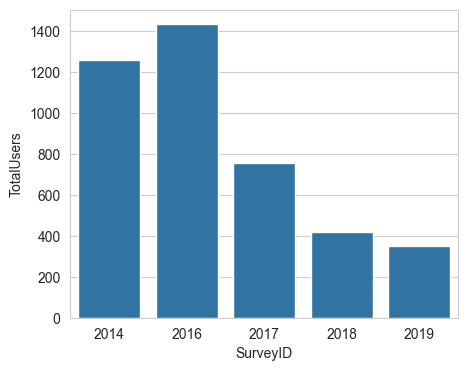

In [202]:
plt.figure(figsize=(5, 4))
sns.set_style(style='whitegrid')
sns.barplot(data=users_over_time, x='SurveyID', y='TotalUsers')

The number of users (people that replied to the survey) are highest in 2016,
 1433 users, and interestingly the second highest in 2014, with 2019 being the 
 lowest with 352 users. 
 The evolution of the number of users and number of replies is more consistent 
 between 2016-2019. 2014 is an outlier.

3. Did all the surveys have the same questions? And how many replies did 
each get?

In [203]:
query = '''SELECT SurveyID, QuestionID, COUNT(1) AS TotalReplies
FROM Answer
GROUP BY SurveyID, QuestionID;
'''

questions_for_each_survey = pd.read_sql_query(query, conn)
questions_for_each_survey

,SurveyID,QuestionID,TotalReplies
0,2014,1,1260
1,2014,2,1260
2,2014,3,1260
3,2014,4,1260
4,2014,5,1260
...,...,...,...
309,2019,85,352
310,2019,86,352
311,2019,87,352
312,2019,88,352


The Surveys do not all have the same questions, although some are in common.

4. Check if all questions had the same amount of replies as the number of 
users.

In [204]:
merged_df = questions_for_each_survey.merge(users_over_time, on='SurveyID')
odd_number_of_replies = merged_df[merged_df.TotalUsers != merged_df
.TotalReplies]
odd_number_of_replies

,SurveyID,QuestionID,TotalReplies,TotalUsers
82,2016,115,2072,1433
83,2016,116,1793,1433
84,2016,117,2692,1433


In [205]:
query = '''SELECT *
FROM Answer
WHERE SurveyID=2016 AND QuestionID BETWEEN 115 AND 117;
'''

pd.read_sql_query(query, conn)

,AnswerText,SurveyID,UserID,QuestionID
0,-1,2016,1261,115
1,"Anxiety Disorder (Generalized, Social, Phobia,...",2016,1262,115
2,"Mood Disorder (Depression, Bipolar Disorder, etc)",2016,1262,115
3,-1,2016,1263,115
4,"Anxiety Disorder (Generalized, Social, Phobia,...",2016,1264,115
...,...,...,...,...
6552,Other,2016,2689,117
6553,Support,2016,2690,117
6554,Back-end Developer,2016,2691,117
6555,DevOps/SysAdmin,2016,2692,117


In the questions 115-117 from year 2016, several users answered more than 
one times.

5. How many questions did each survey have?

In [206]:
questions_per_survey = questions_for_each_survey.groupby(by='SurveyID').size()
questions_per_survey = questions_per_survey.reset_index()
questions_per_survey.columns = ['SurveyID', 'count']
questions_per_survey

,SurveyID,count
0,2014,26
1,2016,60
2,2017,76
3,2018,76
4,2019,76


<Axes: xlabel='SurveyID', ylabel='count'>

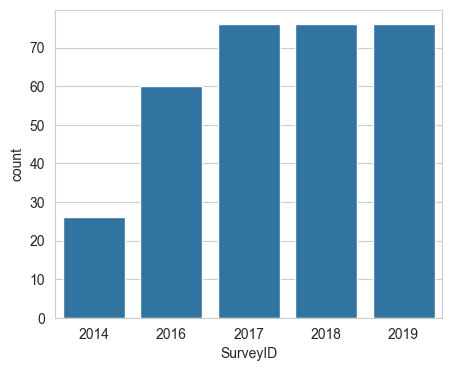

In [207]:
plt.figure(figsize=(5, 4))
sns.set_style(style='whitegrid')
sns.barplot(data=questions_per_survey, x='SurveyID', y='count')

2014 and 2016 both have less questions than the rest. 
Even though, 2014 had many users, it only had around 34% of number of questions 
compared to the surveys 2017-2019, which significantly decreased the amount of
replies it was getting.

6. Which questions were repeated in the surveys throughout the years ?

In [208]:
query = '''SELECT QuestionID, COUNT(DISTINCT SurveyID) AS 
RepeatedQuestions
FROM Answer
GROUP BY QuestionID;
'''

repeated_questions = pd.read_sql_query(query, conn)
repeated_questions

,QuestionID,RepeatedQuestions
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5
...,...,...
100,114,1
101,115,1
102,116,1
103,117,1


7. Are there any users who replied to several surveys ?

In [213]:
query = '''SELECT UserID, COUNT(DISTINCT SurveyID) AS NumberOfSurveys
FROM Answer
GROUP BY UserID
HAVING NumberOfSurveys>1;
'''

pd.read_sql_query(query, conn)

,UserID,NumberOfSurveys


No, all users only appear in one survey.

### 2.1.1 Insights
The surveys are not the same over the years and the sampling population is 
also not the same. 
To analyze the survey replies changes throughout the years, restricting our 
analysis to questions that were repeatedly asked will help its accuracy.